 # Анализ спроса пассажиров российской авиакомпании на рейсы в города, где проходят крупнейшие фестивали

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Изучение данных из файлов и предобработка

### Датасет с информацией о самолетах

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
display(query_1)
query_1.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
#проверяем на дубликаты
print('Количество дубликатов в query_1:', query_1.duplicated().sum())

Количество дубликатов в query_1: 0


>* Пропуски в данных отсутствуют.  
>* Типы данных соответствуют действительности, менять не надо  
>* Дубликатов нет  
>* Странных или выбивающихся значений не обнаружено

### Датасет с информацией о городах и среднем количестве рейсов, прибывающих в каждый город

In [4]:
query_3 = pd.read_csv('/datasets/query_3.csv')
display(query_3.head(20))
query_3.info()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
#проверяем на дубликаты
print('Количество дубликатов в query_3:', query_3.duplicated().sum())

Количество дубликатов в query_3: 0


>* Пропуски в данных отсутствуют  
>* Тип данных верный  
>* Дубликатов нет  
>* Странных или выбивающихся значений нет


## Анализ данных

### ТОП-10 городов по количеству рейсов

In [6]:
top_10cities_flights = query_3.sort_values(by='average_flights', ascending=False).head(10) 
print(top_10cities_flights)

               city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645


### Количество рейсов, совершаемых моделями самолетов

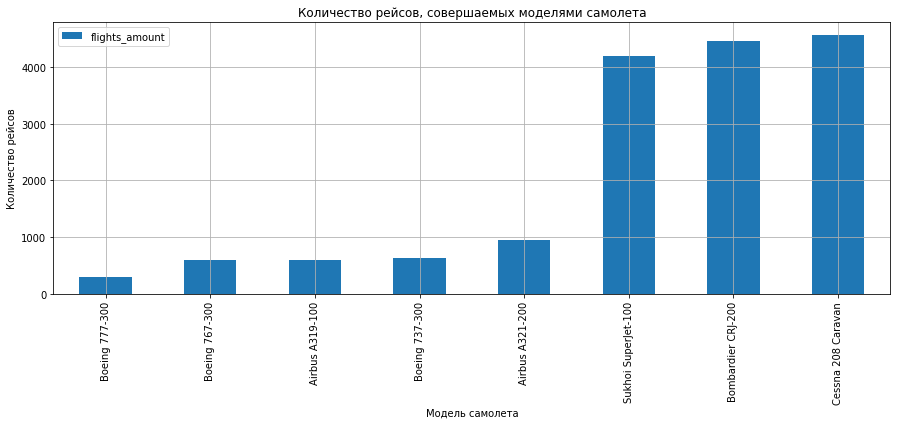

In [7]:
query_1.sort_values(by='flights_amount').plot(kind = 'bar', x='model', figsize = (15,5), grid = True) #строим график
plt.title('Количество рейсов, совершаемых моделями самолета')
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.show()

### Распределение количества рейсов, прибывающих в определенный город

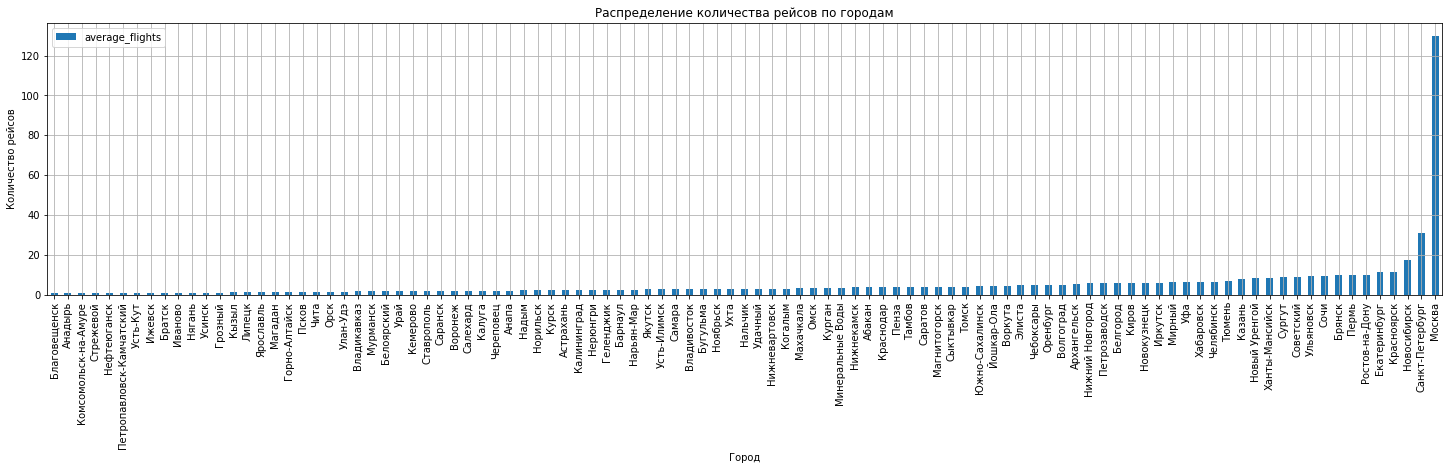

In [8]:
query_3.sort_values(by='average_flights').plot(kind = 'bar', x='city', figsize = (25,5), grid = True) 
plt.title('Распределение количества рейсов по городам')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

### Распределение количества рейсов по ТОП-10 городам

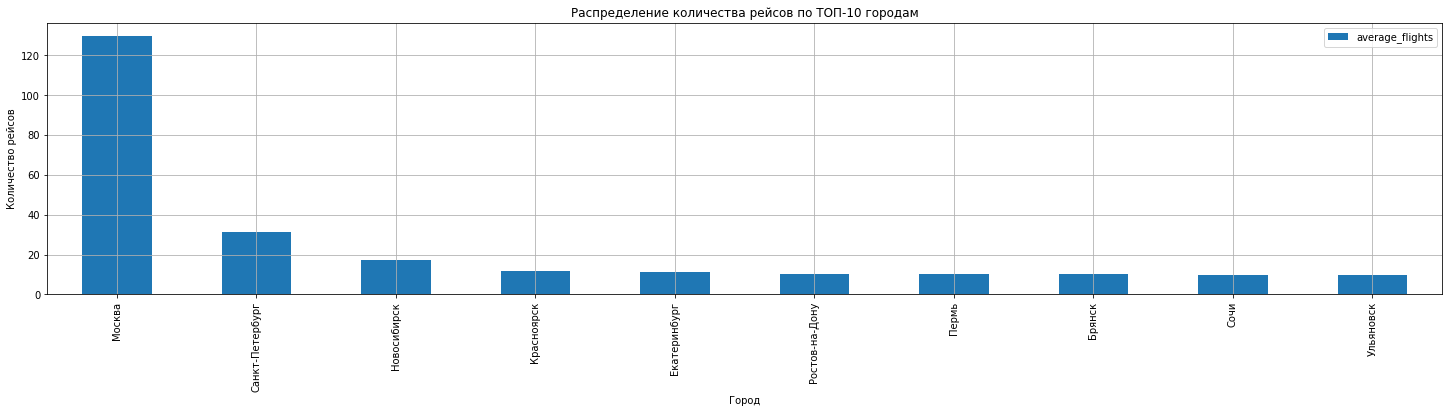

In [9]:
top_10cities_flights.plot(kind = 'bar', x='city', figsize = (25,5), grid = True) 
plt.title('Распределение количества рейсов по ТОП-10 городам')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

## Результаты исследования

1. Модели самолетов Bombardier CRJ-200, Cessna 208 Caravan	4557, Sukhoi SuperJet-100 совершают примерно в 4,5 раза больше рейсов, чем остальные модели самолетов. Они лидируют с большим отрывом  
2. Москва, как город, в который прибывают рейсы, лидирует также с большим отрывом. По сравнению с другими городами (не включая Санкт-Петербург) в Москву прилетает более чем в 7,5 раза больше рейсов.  
3. В Санкт-Петербург по сравнению с другими городами прилетает примерно в 1,82 раза больше рейсов. По сравнению с Москвой в Санкт-Петербург прилетает в 4 раза меньше рейсов. Москва является несомненым лидером.  
4. Тройкой лидеров являются: Москва, СПб и Новосибирск. Остальные города в ТОП-10 характеризуются примерно одинаковым количеством рейсов
